In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

In [2]:
with open("traces-sc128-10000-6100.bin", "rb") as f:
    N, = struct.unpack('<I', f.read(4))
    print(f"N: {N}")
    L, = struct.unpack('<I', f.read(4))
    print(f"L: {L}")
    traces = []
    for n in range(N):
        traces.append(np.array(struct.unpack('<' + 'd' * L, f.read(L * 8)), dtype=np.float64))
    traces = np.array(traces)
del f

N: 10000
L: 6100


i=1: (1500, 3000)

i=1, j=1: (1780, 1960)

i=1, SR: (2320, 2450)

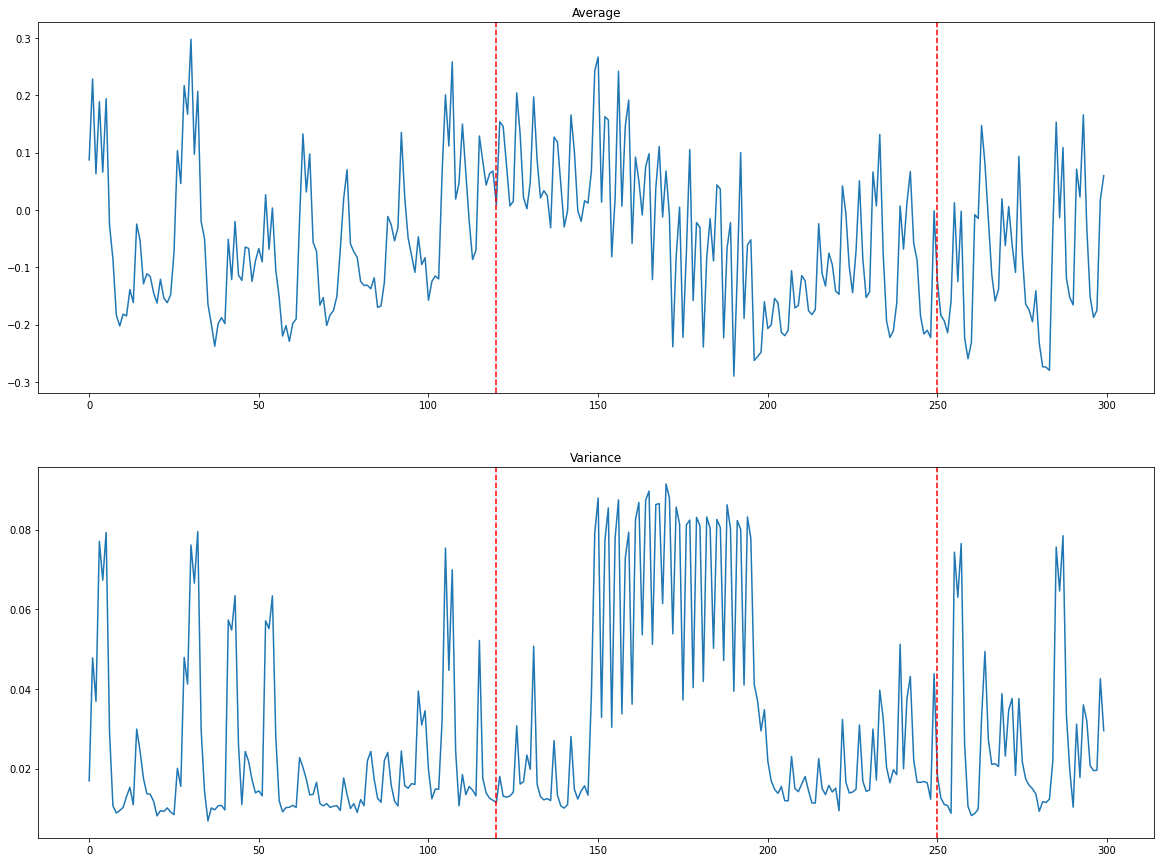

In [41]:
roiL, roiR = 2200, 2500
segL, segR = 2320, 2450
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR], '-')
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

32


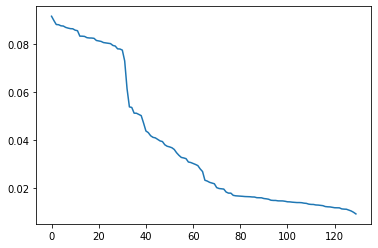

[ 50  45  51  30  36  44  42  48  47  68  53  33  74  62  59  65  41  57
  71  54  56  60  66  63  69  72  39  29  35  75  32  38  49  52  43 119
  46  11  64  67 129 122  61  76  73  58 113  70  28 121  55  77  40  79
  37  31 114 102 107   6  34 111  78  22  17   9  87  95 123  80 115 120
  10 117 118   1  91 112  81 108 126   8 103 124 125 116 127  12   7  90
  98  26  84 100  88  96 106  82  23 110  92  25 109  89  99 105   5 104
  83  97  18  27   4   2  13   3  15  24 128  14  16  85  86   0  93  94
  21  19  20 101]


In [32]:
sig = traces[:, segL:segR]
var = np.std(sig, ddof=1, axis=0)
max_idx = len(var[var > 0.065])
print(max_idx)
var_index = np.argsort(var)[::-1]
plt.plot(var[var_index])
plt.show()
print(var_index)

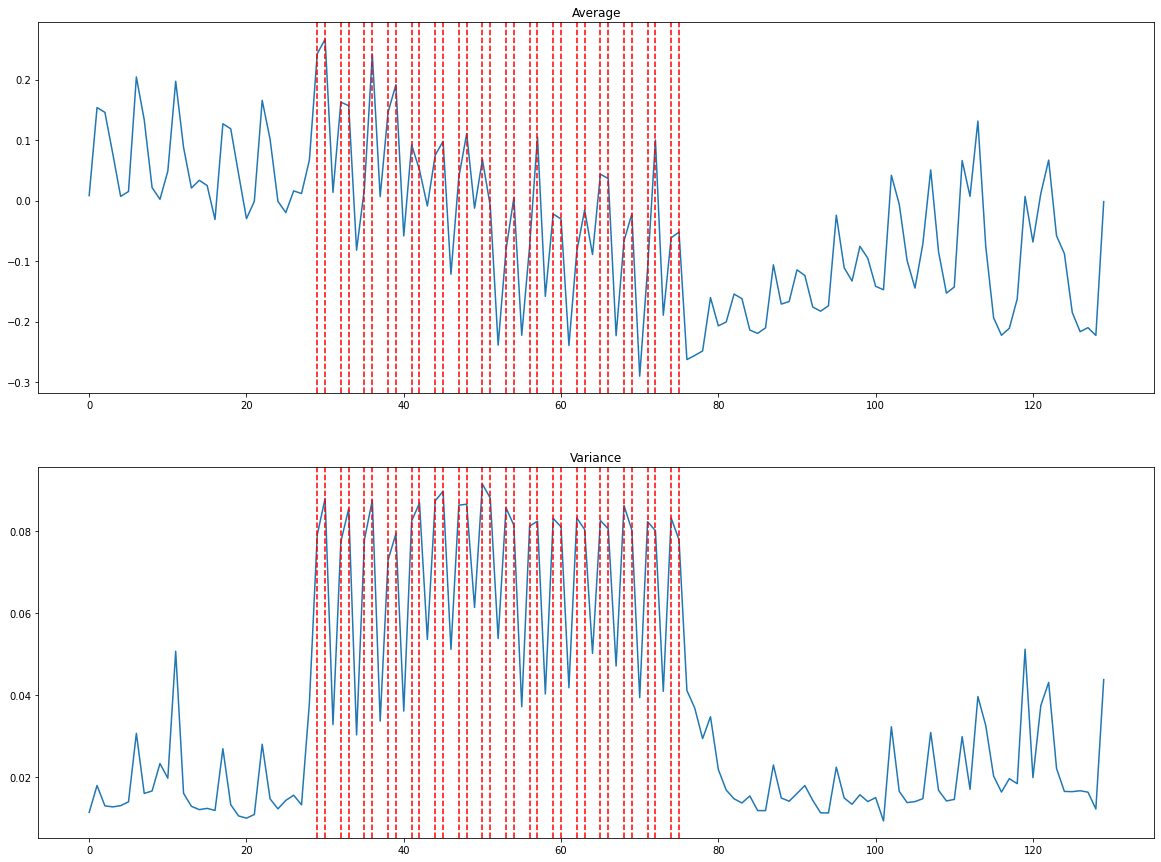

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

In [34]:
np.array(sorted(var_index[:max_idx]))

array([29, 30, 32, 33, 35, 36, 38, 39, 41, 42, 44, 45, 47, 48, 50, 51, 53,
       54, 56, 57, 59, 60, 62, 63, 65, 66, 68, 69, 71, 72, 74, 75])

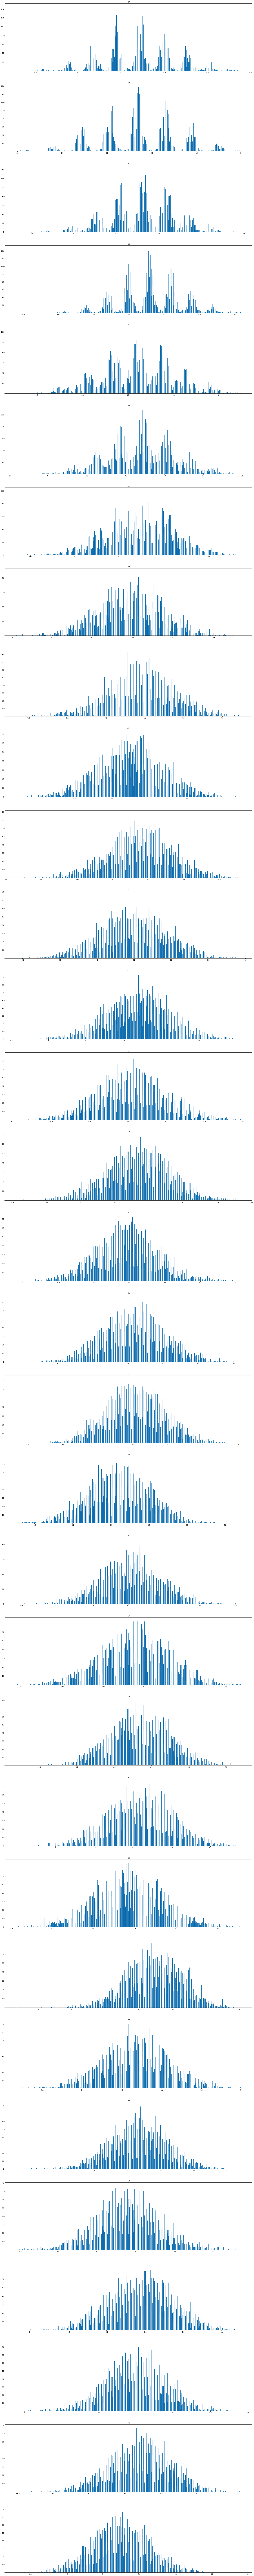

In [35]:
plt.figure(figsize=(30,10 * max_idx))
for i, idx in enumerate(sorted(var_index[:max_idx])):
    plt.subplot(max_idx, 1, i+1)
    plt.hist(sig[:,idx], bins=1000)
    plt.title(idx)
plt.show()

# XOR Analysis

In [25]:
print(var_index[:max_idx])

[50 45 51 30 36 44 42 48 47 68 53 33 74 62 59 65 41 57 71 54 56 60 66 63
 69 72 39 29 35 75 32 38]


In [26]:
sig = traces[:, segL: segR]

<AxesSubplot:>

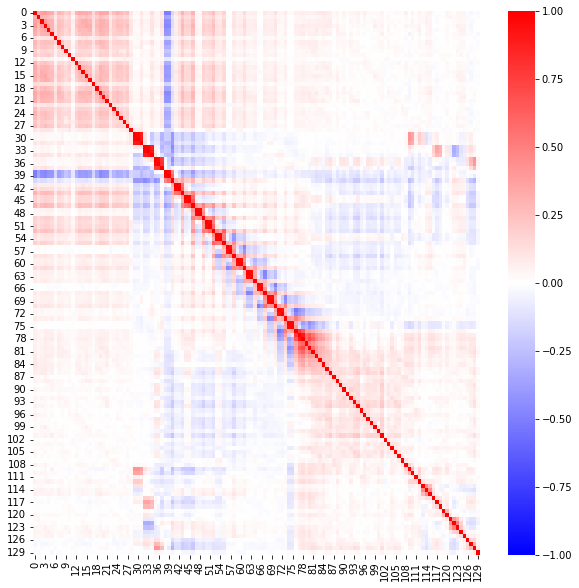

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T), vmin=-1, vmax=1, cmap='bwr')

<AxesSubplot:>

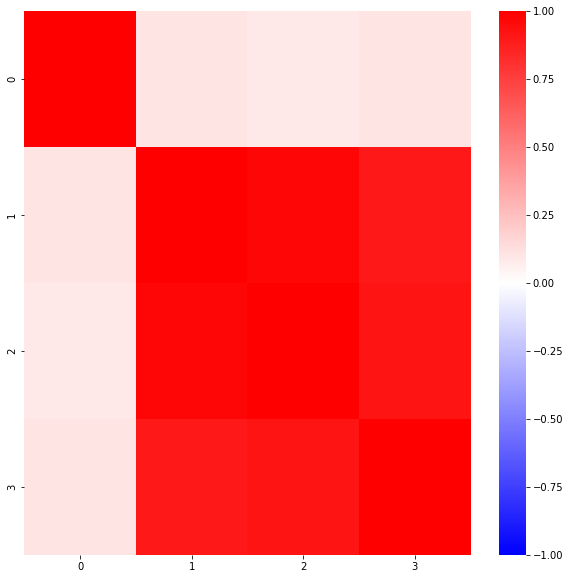

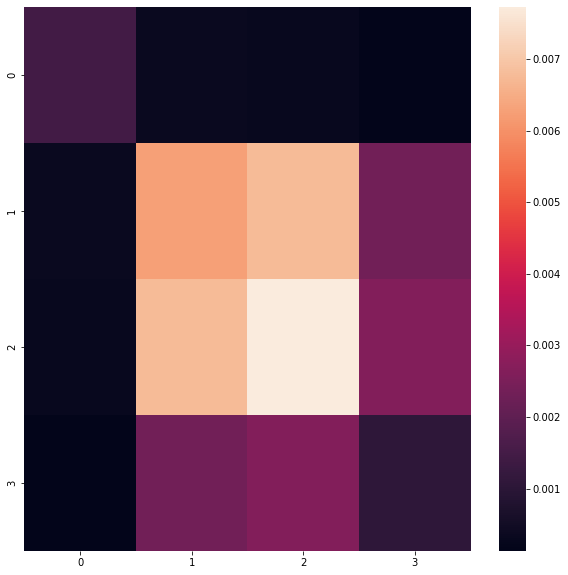

In [37]:
import seaborn as sns
heatmap_roi = slice(28, 32)
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T[heatmap_roi]), vmin=-1, vmax=1, cmap='bwr')
plt.figure(figsize=(10, 10))
sns.heatmap((np.abs(np.cov(sig.T[heatmap_roi]))), )

<AxesSubplot:>

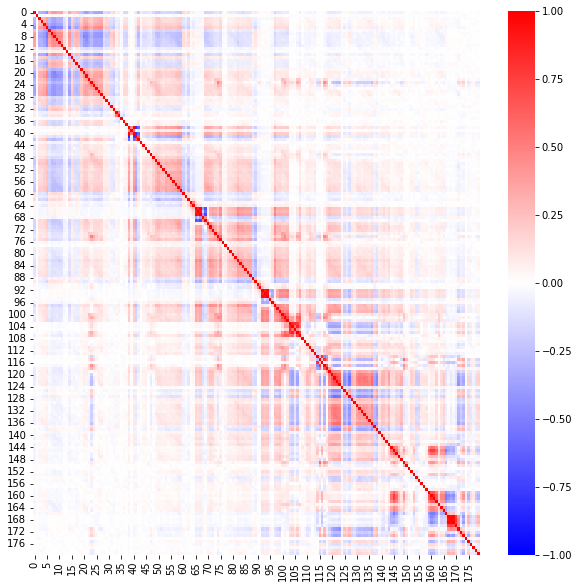

In [45]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T**2), vmin=-1, vmax=1, cmap='bwr')